In [1]:
# import dependencies
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob
import pickle
import pandas as pd
import numpy as np

from dask.diagnostics import ProgressBar

from arboreto.utils import load_tf_names
from arboreto.algo import grnboost2

from ctxcore.rnkdb import FeatherRankingDatabase as RankingDatabase
import pyscenic as ps
from pyscenic.utils import modules_from_adjacencies, load_motifs
from pyscenic.prune import prune2df, df2regulons
from pyscenic.aucell import aucell

import seaborn as sns

import pickle
import re


In [2]:
#load consensus regulons
sample='iGlut_post'
with open('/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/pyscenic/regulons/consensus_5/'+sample+'.p', "rb") as f:
    consensus_regulons = pickle.load(f)
    print(sample)
    print(len(consensus_regulons))


iGlut_post
60


In [3]:
adata = sc.read_h5ad("adata/NGN2iN_TF_batch12_combined_predicted_filtered_doublets.h5ad")

In [4]:
meta_class = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [5]:
dgem_all = pd.DataFrame.sparse.from_spmatrix(adata.X)
dgem_all.index = adata.obs.index
dgem_all.columns = adata.var_names

#calculate regulon acitivity for all regulons detected across samples
auc_mtx_all = aucell(dgem_all, consensus_regulons, num_workers=30)


KeyboardInterrupt: 

In [36]:
import pickle

with open('pyscenic/consensus_5/batch12_combined.p', 'wb') as handle:
    pickle.dump(auc_mtx_all, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [6]:
import pickle

with open('pyscenic/consensus_5/batch12_combined.p', 'rb') as handle:
    auc_mtx_all = pickle.load(handle)


In [7]:
auc_mtx_all

Regulon             NR2F1(+)  BCLAF1(+)  KLF12(+)  ZBTB20(+)   BPTF(+)  \
Cell                                                                     
AAACGAAGTTACGTAC-1  0.000000   0.118037  0.333074   0.175896  0.135617   
AAACGAATCCACTTTA-1  0.086720   0.145821  0.033240   0.029094  0.032677   
AAACGCTCAATAGAGT-1  0.000000   0.465267  0.230958   0.226916  0.134823   
AAAGGATTCACCTACC-1  0.013970   0.345338  0.050578   0.063593  0.067827   
AAAGGATTCTCTCTTC-1  0.064460   0.218964  0.072811   0.017141  0.060847   
...                      ...        ...       ...        ...       ...   
TTTGTTGCATAACGGG-2  0.032551   0.477164  0.526527   0.214838  0.179878   
TTTGTTGGTCATCGCG-2  0.098313   0.378081  0.657875   0.252072  0.188158   
TTTGTTGGTCTACAAC-2  0.070337   0.298990  0.532788   0.147530  0.169160   
TTTGTTGGTCTGCATA-2  0.110988   0.392597  0.066638   0.042960  0.164457   
TTTGTTGTCCATCAGA-2  0.071871   0.234282  0.080263   0.021160  0.050893   

Regulon             TFDP2(+)  ZNF148(+)   CHD2(+)  PHOX2B(+)  FOXM1(+)  ...  \
Cell                                                                    ...   
AAACGAAGTTACGTAC-1  0.198157   0.300255  0.081978   0.189196  0.000000  ...   
AAACGAATCCACTTTA-1  0.059599   0.006426  0.042569   0.106195  0.008630  ...   
AAACGCTCAATAGAGT-1  0.116574   0.129405  0.118334   0.114652  0.000000  ...   
AAAGGATTCACCTACC-1  0.032633   0.039489  0.089441   0.031960  0.019492  ...   
AAAGGATTCTCTCTTC-1  0.047995   0.031302  0.069650   0.087206  0.012721  ...   
...                      ...        ...       ...        ...       ...  ...   
TTTGTTGCATAACGGG-2  0.109758   0.249272  0.120244   0.075007  0.001919  ...   
TTTGTTGGTCATCGCG-2  0.451207   0.190923  0.117089   0.044336  0.007626  ...   
TTTGTTGGTCTACAAC-2  0.288313   0.204785  0.120970   0.000000  0.006627  ...   
TTTGTTGGTCTGCATA-2  0.060802   0.152875  0.106098   0.051224  0.045343  ...   
TTTGTTGTCCATCAGA-2  0.051879   0.062966  0.055028   0.093770  0.007300  ...   

Regulon              RARB(+)  SOX11(+)   NFIA(+)   PBX1(+)   E2F8(+)  \
Cell                                                                   
AAACGAAGTTACGTAC-1  0.161712  0.267424  0.445745  0.742655  0.004069   
AAACGAATCCACTTTA-1  0.036220  0.292944  0.001273  0.070670  0.023766   
AAACGCTCAATAGAGT-1  0.063865  0.769863  0.075381  0.221936  0.004868   
AAAGGATTCACCTACC-1  0.023872  0.426435  0.020165  0.022962  0.033496   
AAAGGATTCTCTCTTC-1  0.027644  0.443790  0.152922  0.049094  0.053939   
...                      ...       ...       ...       ...       ...   
TTTGTTGCATAACGGG-2  0.091244  0.806628  0.096579  0.594661  0.007595   
TTTGTTGGTCATCGCG-2  0.138060  0.595942  0.186258  0.247778  0.007886   
TTTGTTGGTCTACAAC-2  0.122691  0.613411  0.125821  0.308827  0.010214   
TTTGTTGGTCTGCATA-2  0.103028  0.566476  0.152247  0.139107  0.033755   
TTTGTTGTCCATCAGA-2  0.047822  0.367187  0.000977  0.138909  0.026609   

Regulon             TFAP2A(+)  NFE2L1(+)  TCF7L1(+)   E2F3(+)  SMAD9(+)  
Cell                                                                     
AAACGAAGTTACGTAC-1   0.078750   0.206580   0.141155  0.040512  0.104331  
AAACGAATCCACTTTA-1   0.000000   0.329684   0.011541  0.000619  0.020238  
AAACGCTCAATAGAGT-1   0.000000   0.592460   0.165215  0.044870  0.044204  
AAAGGATTCACCTACC-1   0.018676   0.276050   0.006712  0.086868  0.016649  
AAAGGATTCTCTCTTC-1   0.000000   0.296684   0.006604  0.034486  0.007865  
...                       ...        ...        ...       ...       ...  
TTTGTTGCATAACGGG-2   0.000000   0.616334   0.039112  0.031626  0.099923  
TTTGTTGGTCATCGCG-2   0.105064   0.400945   0.279714  0.036845  0.113051  
TTTGTTGGTCTACAAC-2   0.101778   0.383108   0.233593  0.057406  0.128124  
TTTGTTGGTCTGCATA-2   0.000000   0.428594   0.174093  0.057700  0.014026  
TTTGTTGTCCATCAGA-2   0.000000   0.288988   0.050978  0.011693  0.048615  

[9384 rows x 60 columns]

In [8]:
adata2 = sc.read_h5ad("scanpy/NGN2iN_TF_batch12_combined_dr_clustered.h5ad")

In [9]:
adata2

AnnData object with n_obs × n_vars = 9384 × 7333
    obs: 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'x', 'y', 'label_NFATC1', 'label_LEF1', 'label_LHX4', 'label_NEUROD1', 'label_PHOX2B', 'label_LHX9', 'label_MSX1', 'label_ZFHX3', 'label_TLX2', 'label_TCF7L2', 'label_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HO

In [10]:
gene_list1 = ['NFIA','MEIS2','RXRG','RARB','HOXB3','SMAD9']
gene_list2 = ['FOXO3', 'NFATC1', 'TCF7L1', 'TCF7L2', 'TLX2', 'ZFHX3', 'MSX1', 'LHX9', 'PHOX2B', 'NEUROD1', 'LHX4', 'LEF1']

gene_list2 = gene_list2 + gene_list1
gene_list2_regulons = [gene+'(+)' for gene in gene_list2]

In [11]:
regulons_oi = [x for x in auc_mtx_all.columns if x in gene_list2_regulons]

In [12]:
adata2

AnnData object with n_obs × n_vars = 9384 × 7333
    obs: 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1', 'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2', 'FB_TCF7L1', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1', 'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2', 'TF_TCF7L1', 'TF_EGFP', 'x', 'y', 'label_NFATC1', 'label_LEF1', 'label_LHX4', 'label_NEUROD1', 'label_PHOX2B', 'label_LHX9', 'label_MSX1', 'label_ZFHX3', 'label_TLX2', 'label_TCF7L2', 'label_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA', 'FB_MEIS2', 'FB_HOXB3', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA', 'TF_MEIS2', 'TF_HO

In [13]:
adata2.obs[regulons_oi] = auc_mtx_all.loc[adata2.obs_names,regulons_oi]

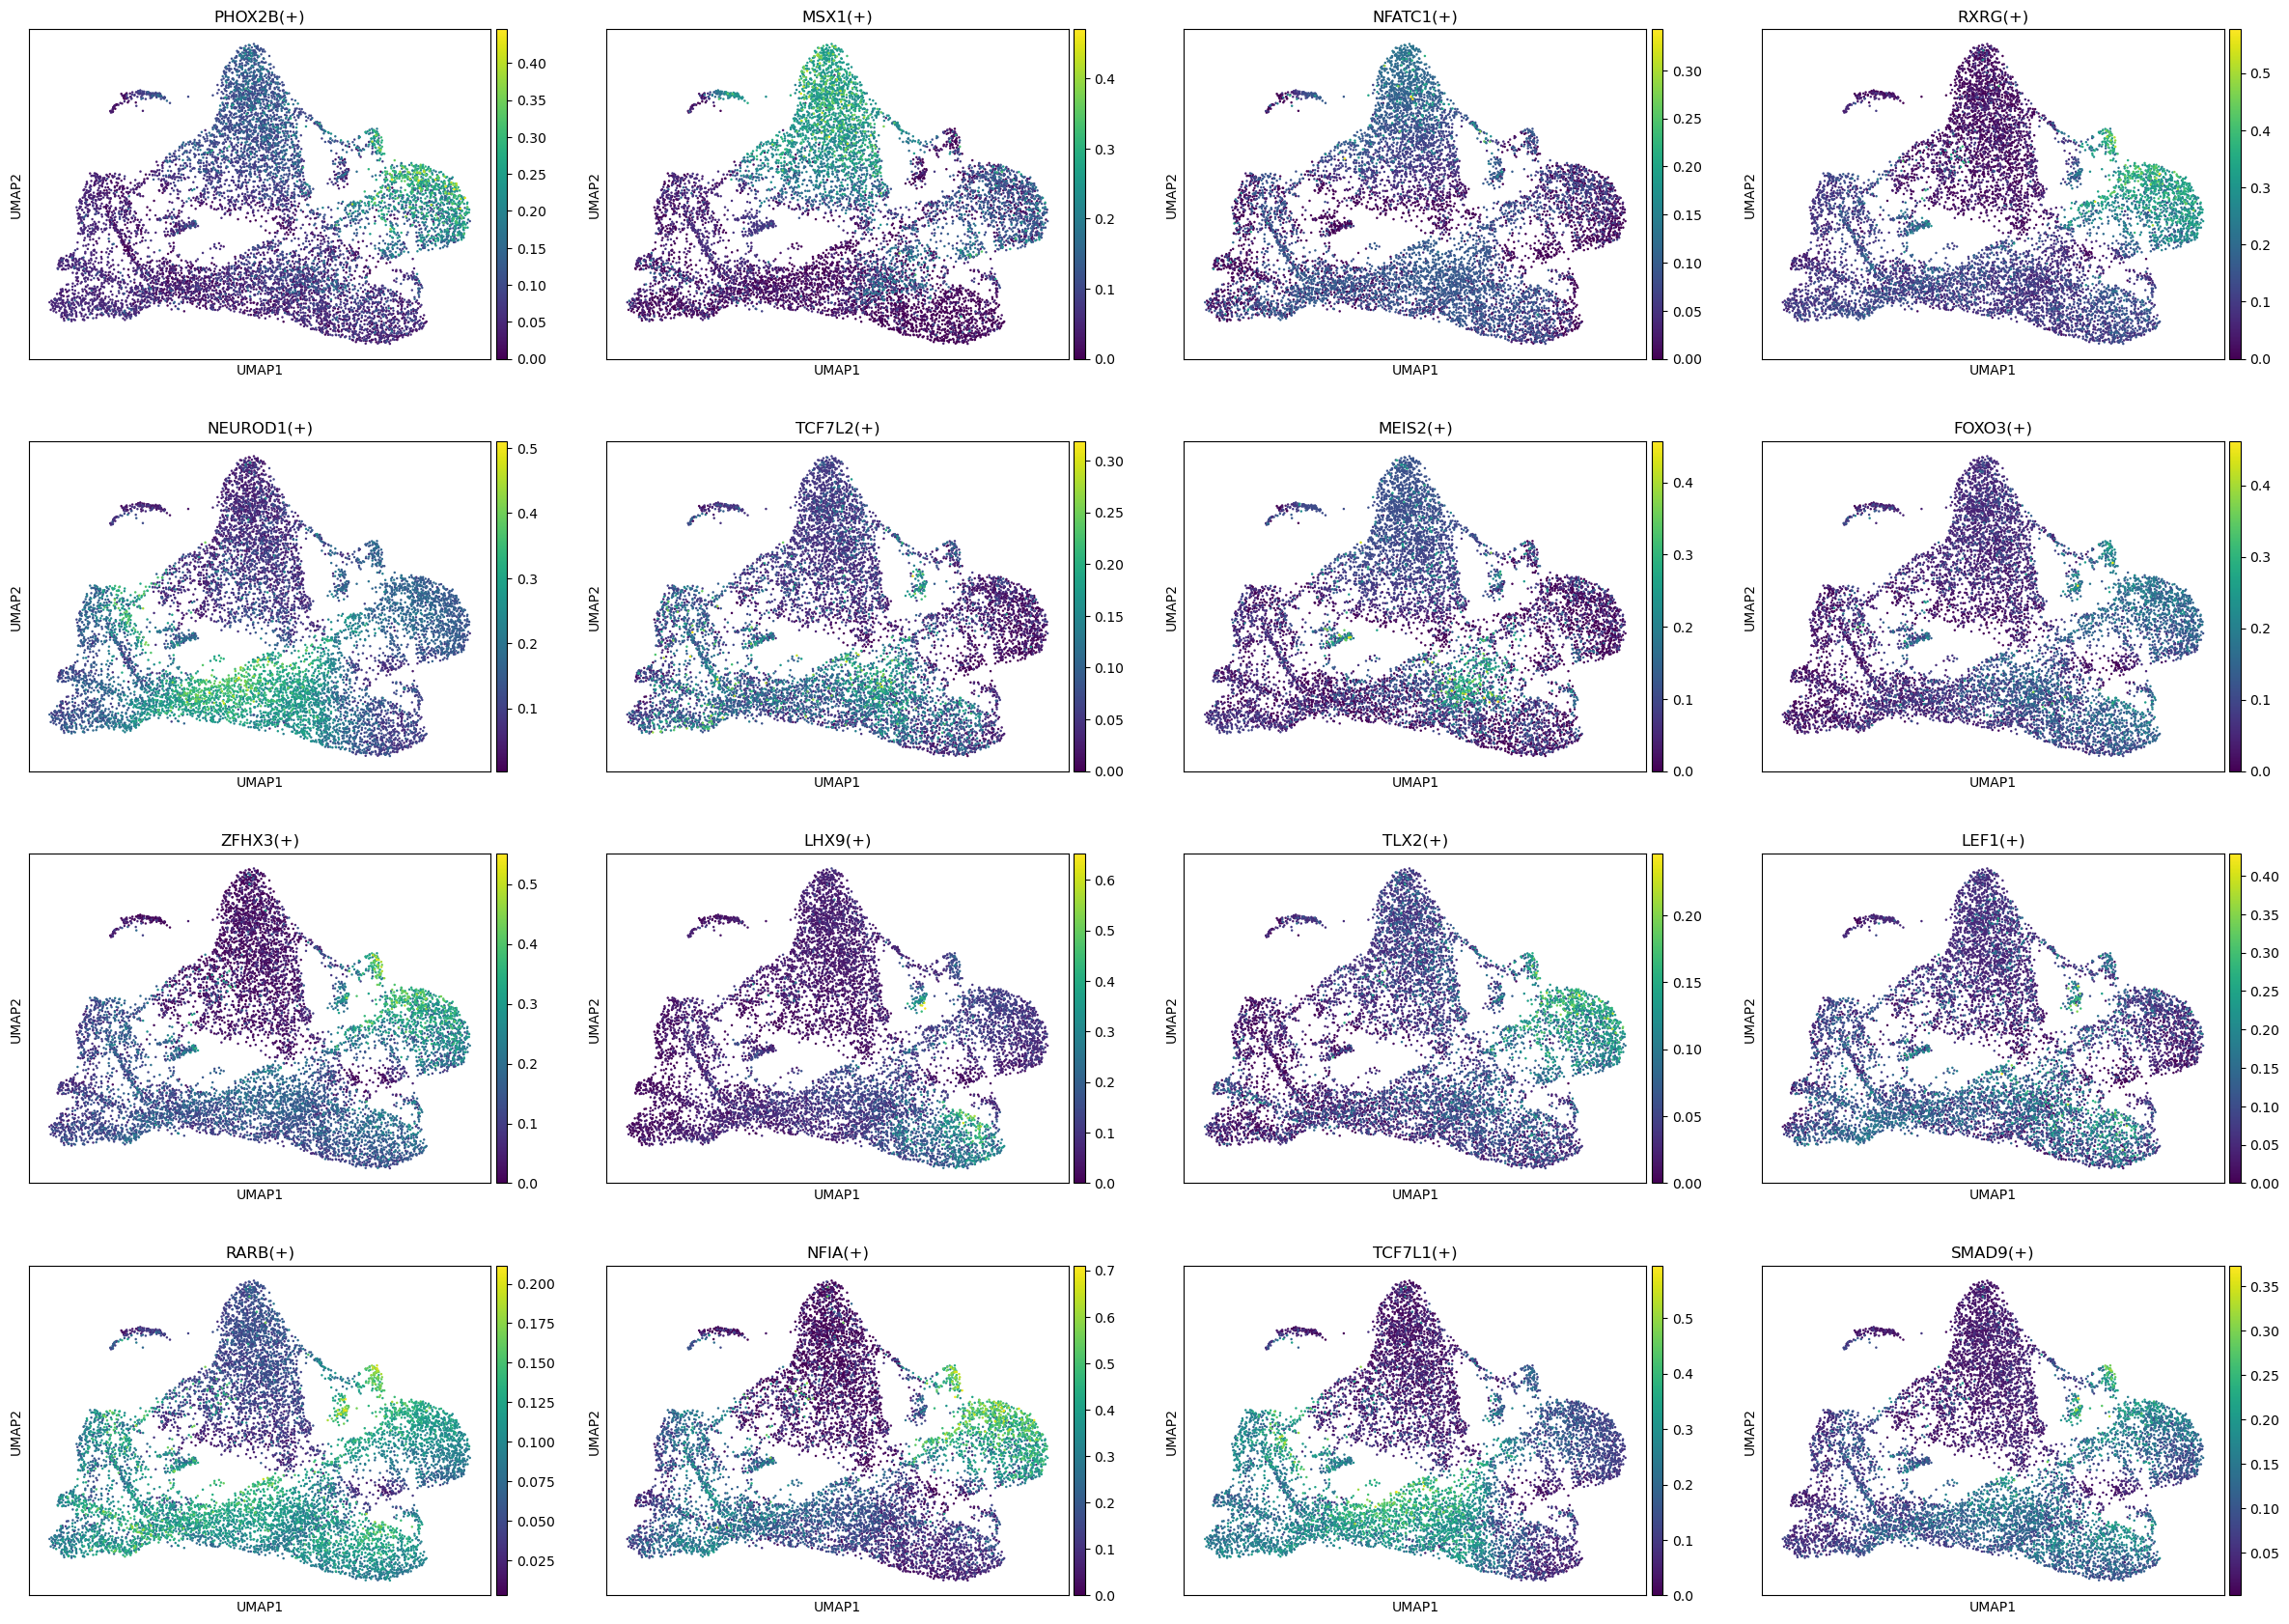

In [14]:
sc.pl.umap(adata2,color=regulons_oi)

In [15]:
meta_use = adata2.obs.copy()

In [16]:
sel_genes = ['TLX2','MSX1','TCF7L2','TCF7L1','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','ZFHX3','SMAD9','RXRG']

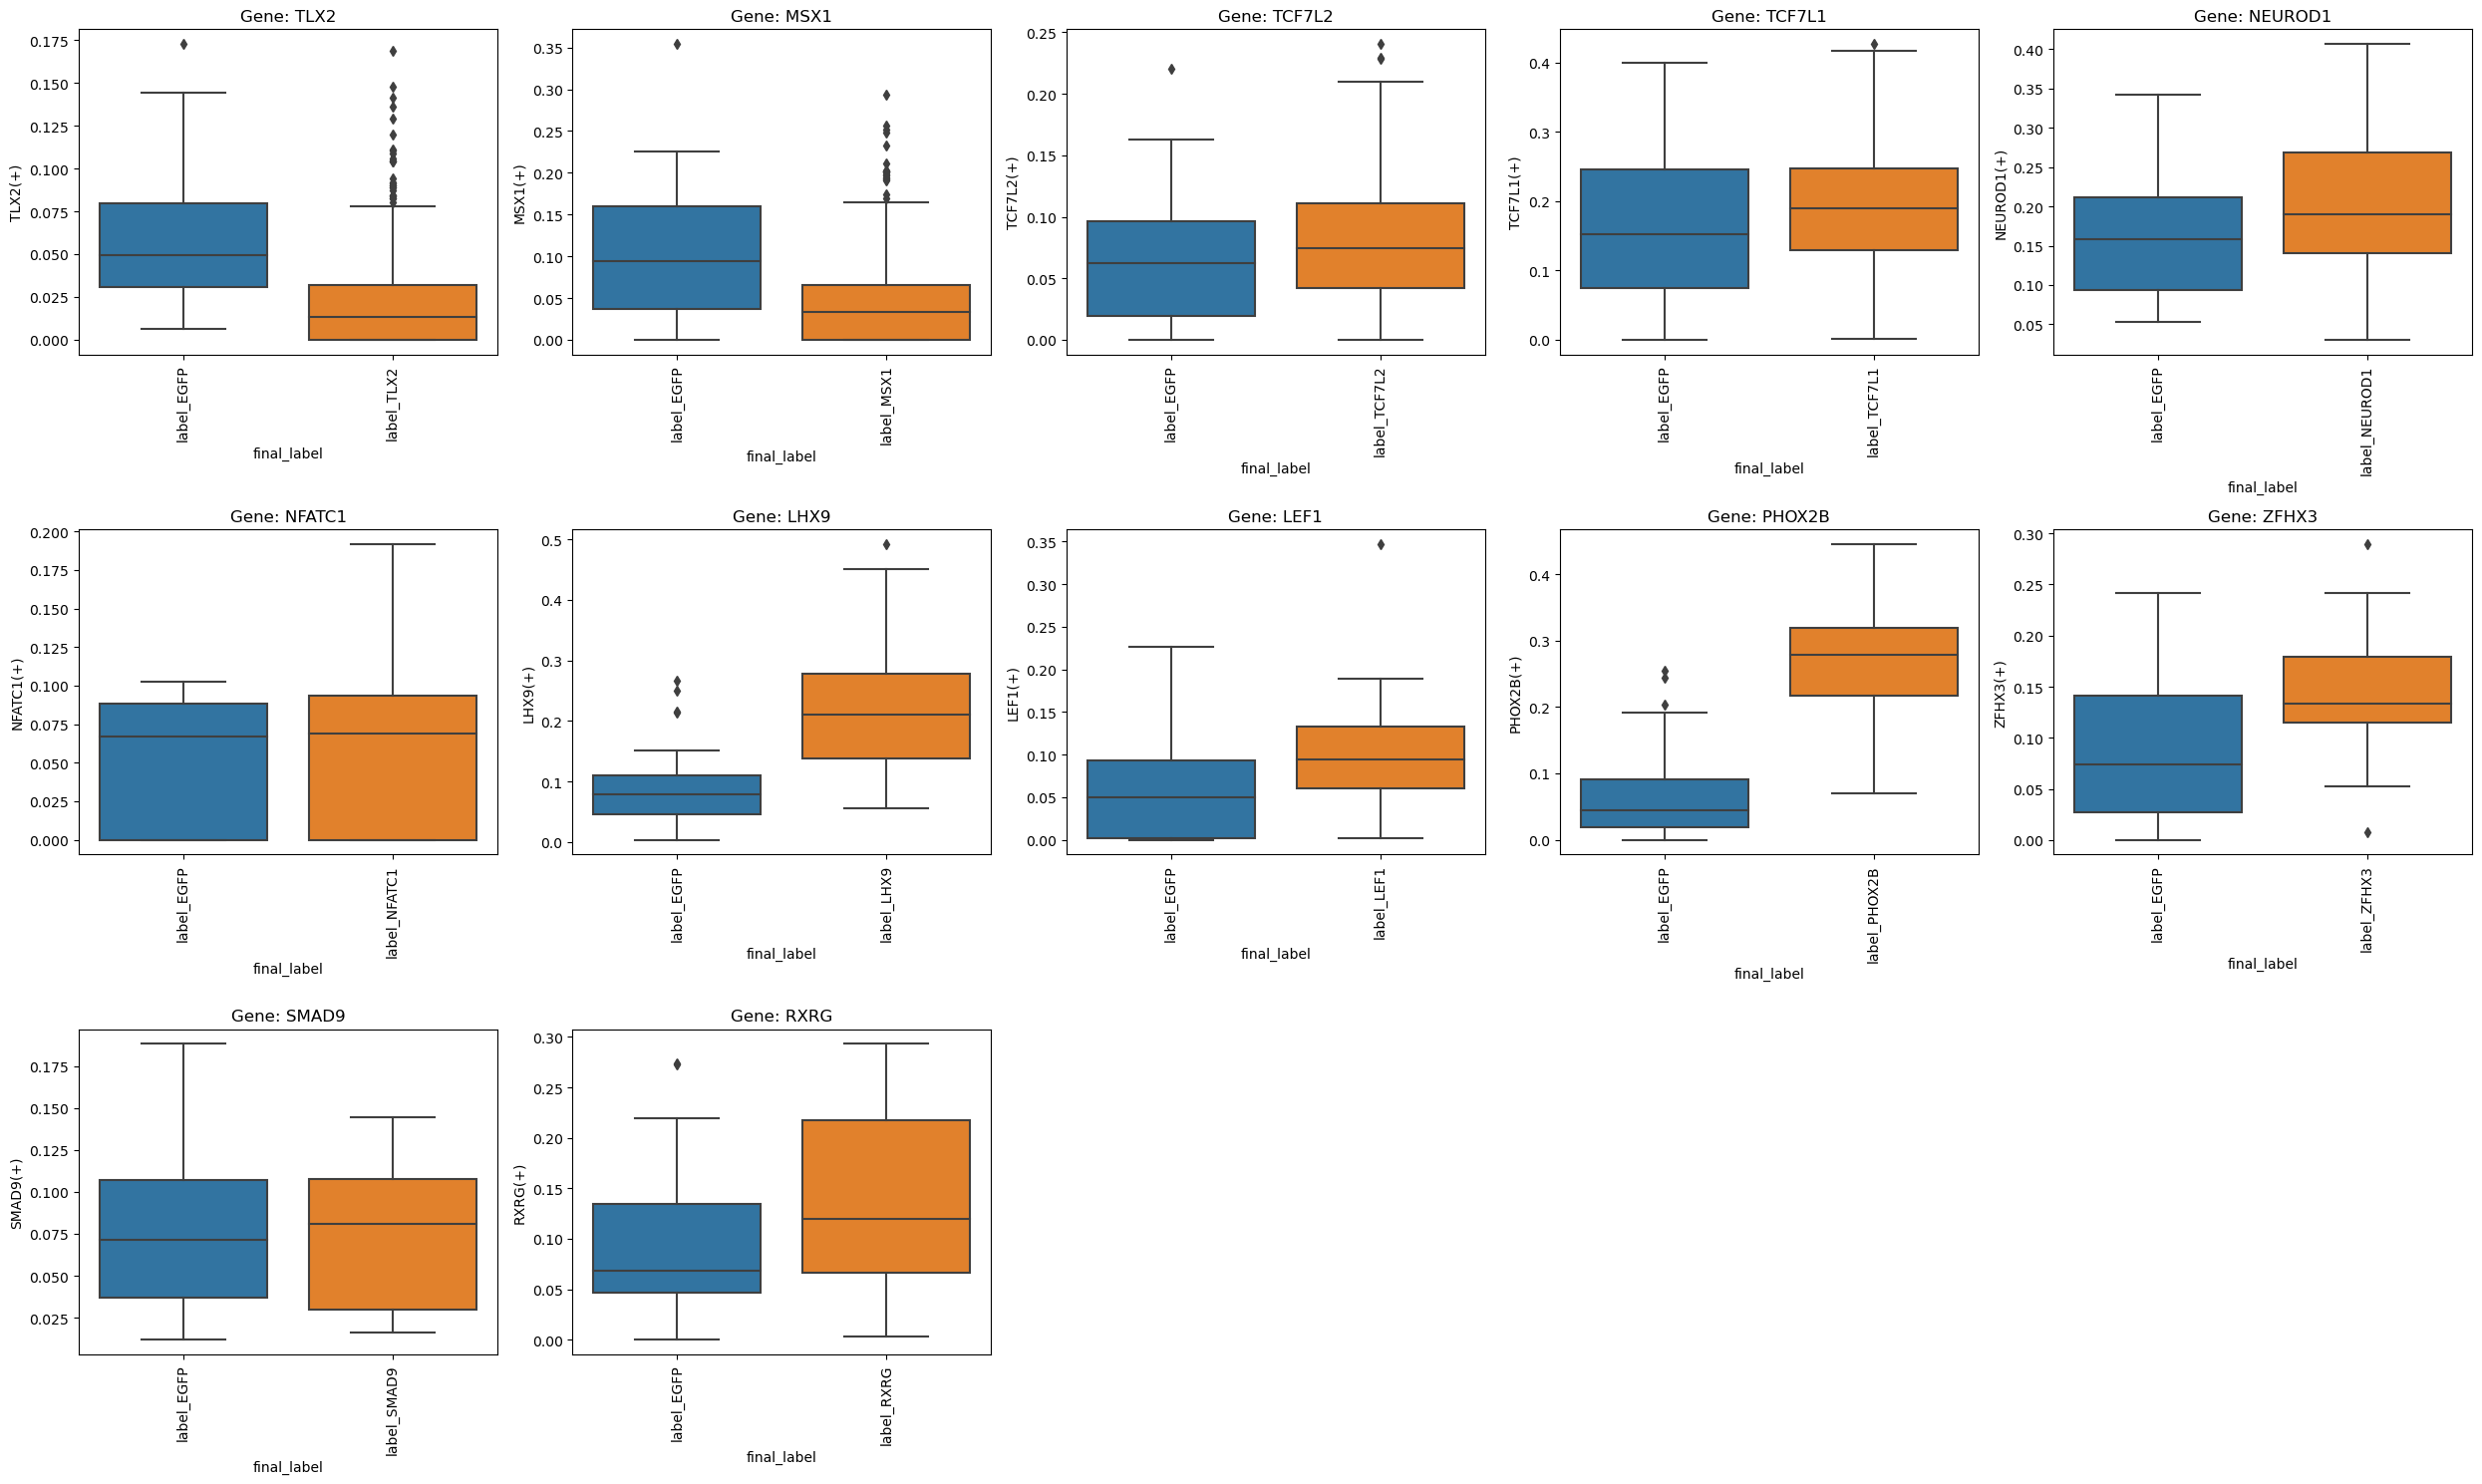

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots_in_grid(meta_use, sel_genes, label_use='final_label', ncols=5):
    nrows = int(np.ceil(len(sel_genes) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for idx, gene in enumerate(sel_genes):
        row = idx // ncols
        col = idx % ncols

        ax = axs[row, col] if nrows > 1 else axs[col]

        sel_labels = ['label_EGFP', 'label_' + gene]
        meta_use_sel = meta_use.loc[meta_use[label_use].isin(sel_labels)].copy()
        meta_use_sel[label_use] = meta_use_sel[label_use].astype('str')

        sns.boxplot(ax=ax, x=label_use, y=gene + '(+)', data=meta_use_sel)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'Gene: {gene}')

    # Hide any empty subplots
    for idx in range(len(sel_genes), nrows * ncols):
        fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.savefig("figures/boxplots_regulons_oe.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()

# Example usage:
plot_boxplots_in_grid(meta_use, sel_genes)


In [19]:
meta_class

n_counts  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACGAAGTTACGTAC-1    5890.0               2850                 7.955425   
AAACGAATCCACTTTA-1     554.0                270                 5.602119   
AAACGCTCAATAGAGT-1   43372.0               7764                 8.957382   
AAAGGATTCACCTACC-1    2925.0               1220                 7.107425   
AAAGGATTCTCTCTTC-1     720.0                513                 6.242223   
...                      ...                ...                      ...   
TTTGTTGCATAACGGG-2   46837.0               8919                 9.096051   
TTTGTTGGTCATCGCG-2   21623.0               6112                 8.718173   
TTTGTTGGTCTACAAC-2   23331.0               6141                 8.722906   
TTTGTTGGTCTGCATA-2   31058.0               6840                 8.830689   
TTTGTTGTCCATCAGA-2     702.0                429                 6.063785   

                    total_counts  log1p_total_counts  \
AAACGAAGTTACGTAC-1        5890.0            8.681181   
AAACGAATCCACTTTA-1         554.0            6.318968   
AAACGCTCAATAGAGT-1       43372.0           10.677592   
AAAGGATTCACCTACC-1        2925.0            7.981391   
AAAGGATTCTCTCTTC-1         720.0            6.580639   
...                          ...                 ...   
TTTGTTGCATAACGGG-2       46837.0           10.754450   
TTTGTTGGTCATCGCG-2       21623.0            9.981559   
TTTGTTGGTCTACAAC-2       23331.0           10.057581   
TTTGTTGGTCTGCATA-2       31058.0           10.343644   
TTTGTTGTCCATCAGA-2         702.0            6.555357   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAACGAAGTTACGTAC-1                   15.789474            592.0   
AAACGAATCCACTTTA-1                   27.256318             29.0   
AAACGCTCAATAGAGT-1                   10.260076            972.0   
AAAGGATTCACCTACC-1                   16.854701              8.0   
AAAGGATTCTCTCTTC-1                   15.833333              4.0   
...                                        ...              ...   
TTTGTTGCATAACGGG-2                    7.876252           1102.0   
TTTGTTGGTCATCGCG-2                   11.964112           1196.0   
TTTGTTGGTCTACAAC-2                   15.957310           1353.0   
TTTGTTGGTCTGCATA-2                   10.551227           1747.0   
TTTGTTGTCCATCAGA-2                   19.373219             39.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACGAAGTTACGTAC-1               6.385194      10.050934              122.0   
AAACGAATCCACTTTA-1               3.401197       5.234657              232.0   
AAACGCTCAATAGAGT-1               6.880384       2.241077             5687.0   
AAAGGATTCACCTACC-1               2.197225       0.273504              997.0   
AAAGGATTCTCTCTTC-1               1.609438       0.555556              129.0   
...                                   ...            ...                ...   
TTTGTTGCATAACGGG-2               7.005789       2.352841             3503.0   
TTTGTTGGTCATCGCG-2               7.087574       5.531148             1389.0   
TTTGTTGGTCTACAAC-2               7.210818       5.799151              910.0   
TTTGTTGGTCTGCATA-2               7.466227       5.624960             4713.0   
TTTGTTGTCCATCAGA-2               3.688880       5.555556              147.0   

                    ...  label_RXRG  label_RARB  label_NFIA  label_MEIS2  \
AAACGAAGTTACGTAC-1  ...         0.0         0.0         0.0          0.0   
AAACGAATCCACTTTA-1  ...         0.0         0.0         0.0          0.0   
AAACGCTCAATAGAGT-1  ...         0.0         0.0         0.0          0.0   
AAAGGATTCACCTACC-1  ...         0.0         0.0         0.0          0.0   
AAAGGATTCTCTCTTC-1  ...         0.0         0.0         0.0          0.0   
...                 ...         ...         ...         ...          ...   
TTTGTTGCATAACGGG-2  ...         0.0         0.0         0.0          0.0   
TTTGTTGGTCATCGCG-2  ...         0.0         0.0         0.0          0.0

In [20]:
meta_class.loc[meta_use.index,regulons_oi] = meta_use[regulons_oi]

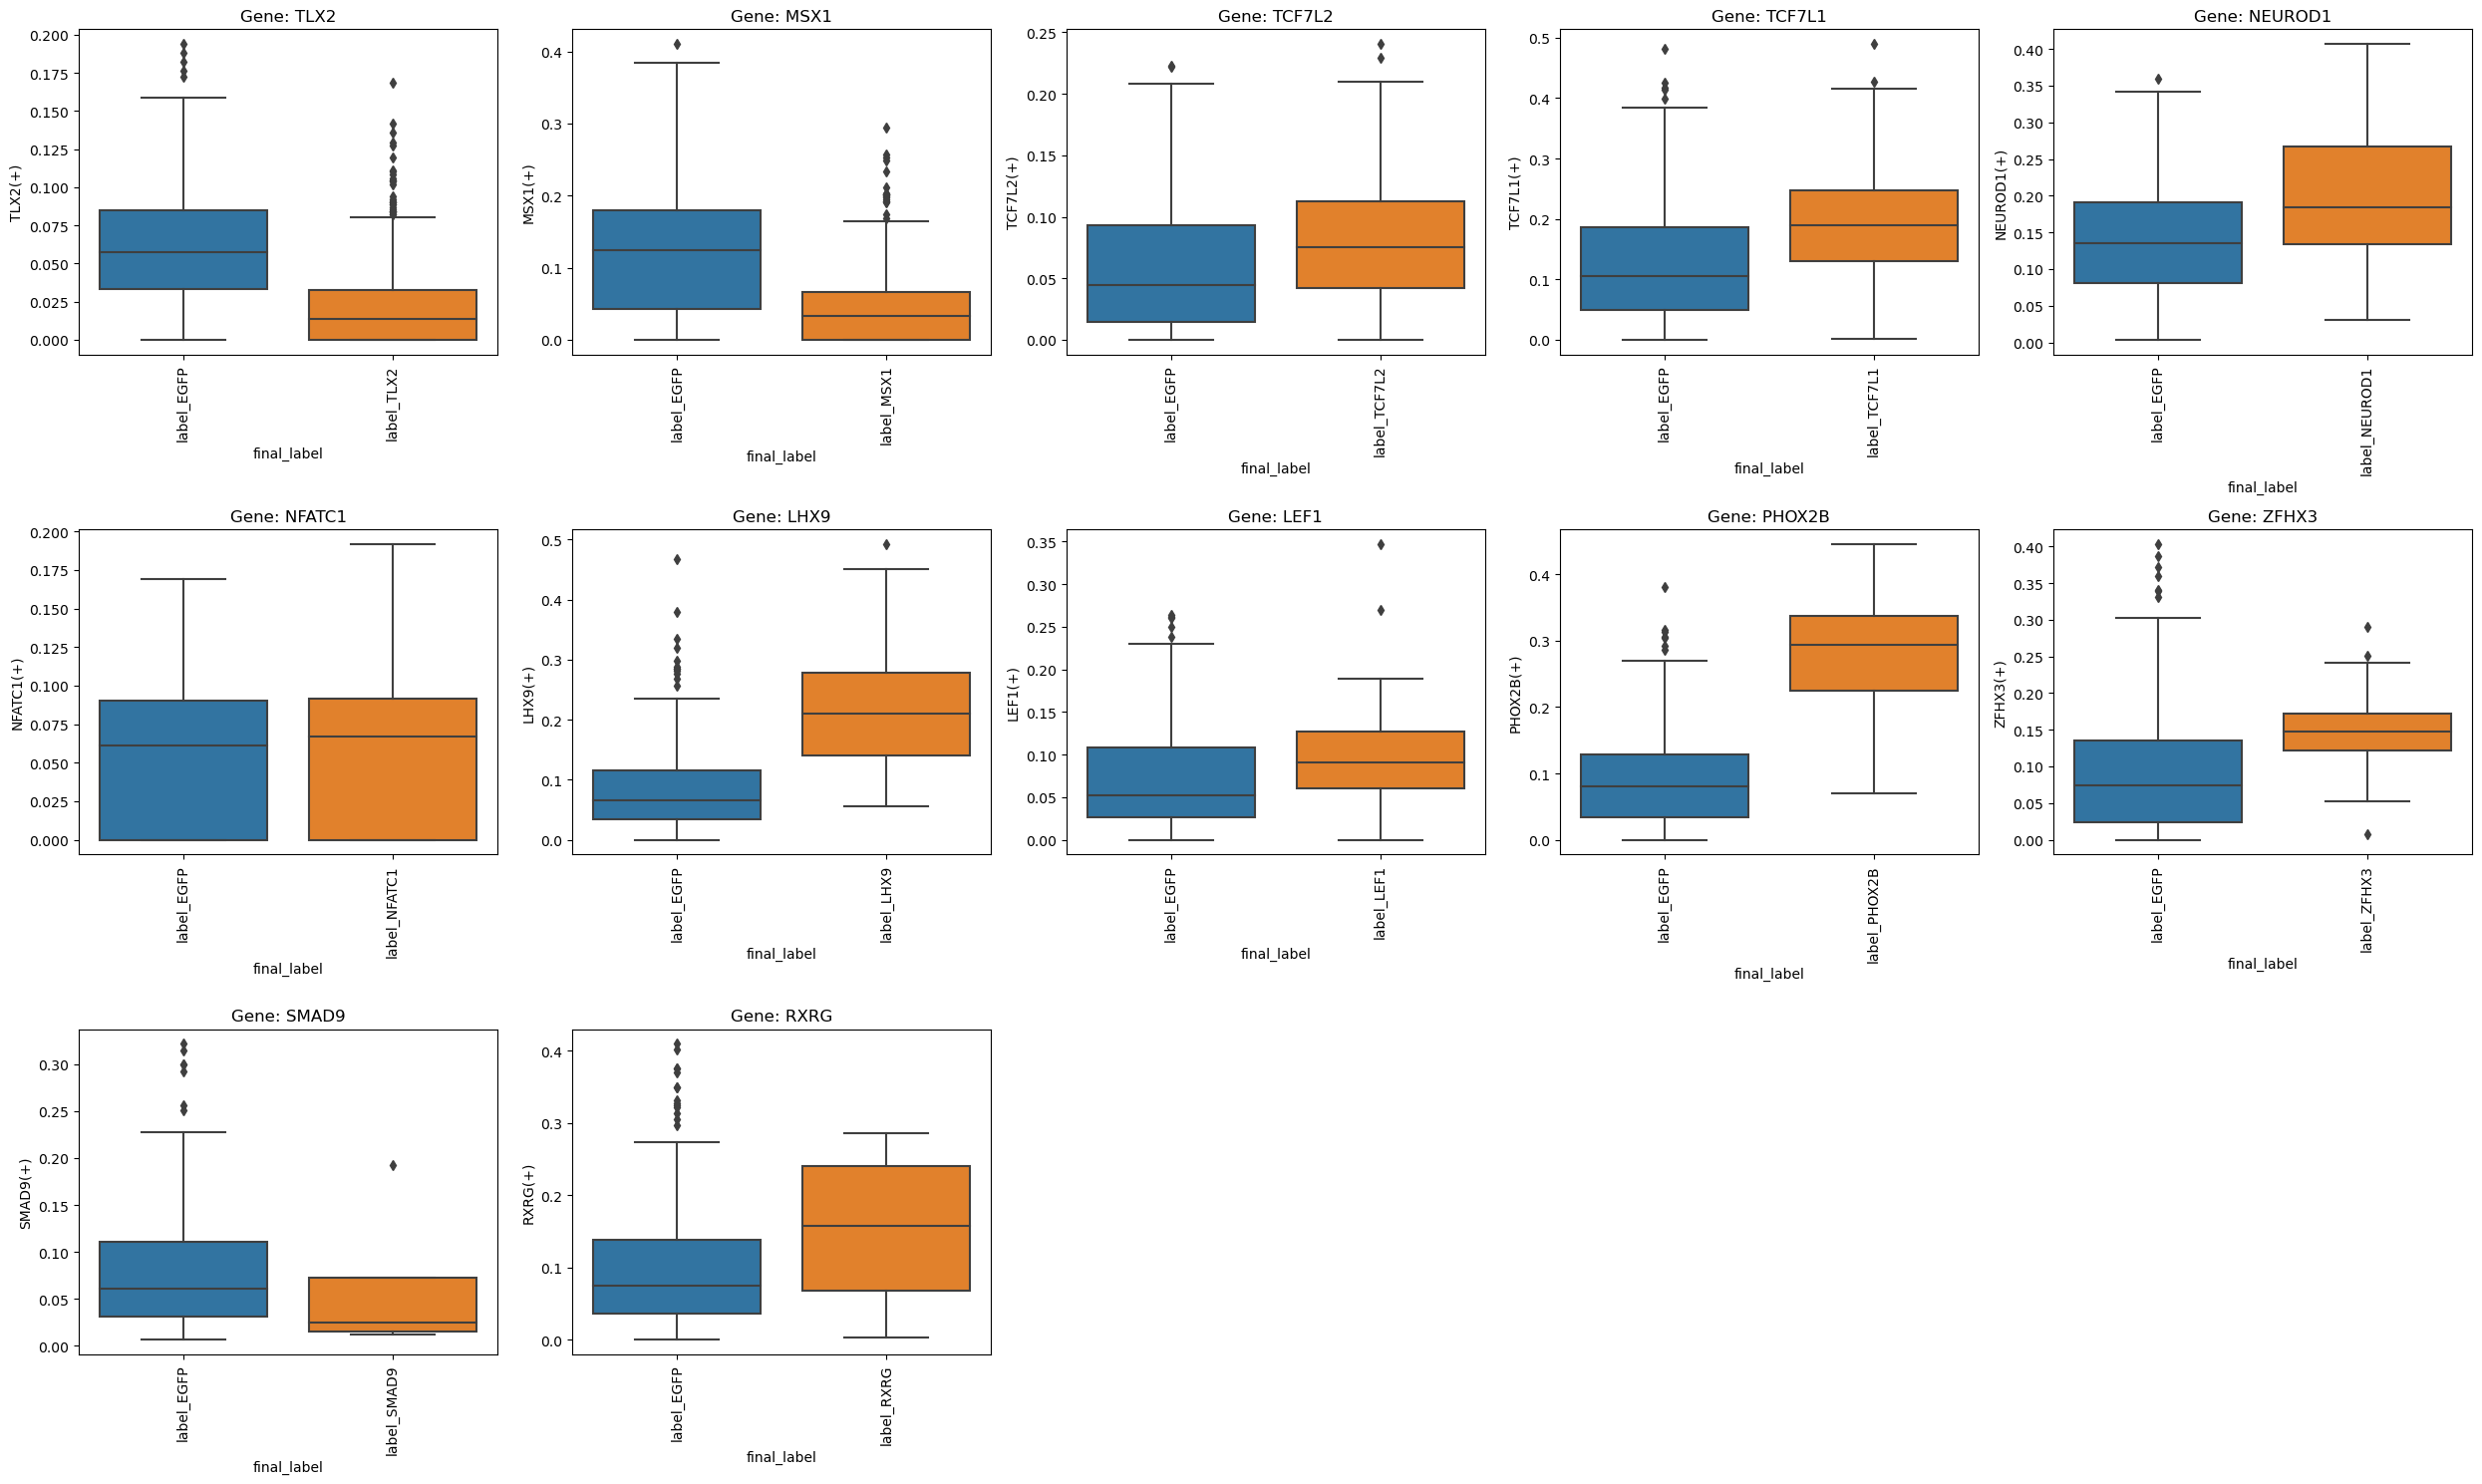

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots_in_grid(meta_use, sel_genes, label_use='final_label', ncols=5):
    nrows = int(np.ceil(len(sel_genes) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for idx, gene in enumerate(sel_genes):
        row = idx // ncols
        col = idx % ncols

        ax = axs[row, col] if nrows > 1 else axs[col]

        sel_labels = ['label_EGFP', 'label_' + gene]
        meta_use_sel = meta_use.loc[meta_use[label_use].isin(sel_labels)].copy()
        meta_use_sel[label_use] = meta_use_sel[label_use].astype('str')

        sns.boxplot(ax=ax, x=label_use, y=gene + '(+)', data=meta_use_sel)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'Gene: {gene}')

    # Hide any empty subplots
    for idx in range(len(sel_genes), nrows * ncols):
        fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.savefig("figures/boxplots_regulons_oe.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()
# Example usage:
plot_boxplots_in_grid(meta_class, sel_genes)


In [22]:
meta_class.columns

Index(['n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'n_genes', 'percent_mito', 'outlier', 'mt_outlier', 'doublet_score',
       'predicted_doublet', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1',
       'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2',
       'FB_TCF7L1', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1',
       'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2',
       'TF_TCF7L1', 'TF_EGFP', 'x', 'y', 'label_NFATC1', 'label_LEF1',
       'label_LHX4', 'label_NEUROD1', 'label_PHOX2B', 'label_LHX9',
       'label_MSX1', 'label_ZFHX3', 'label_TLX2', 'label_TCF7L2',
       'label_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA',
       'FB_MEIS2', 'FB_HOXB3', 'TF_SMAD9', 'TF_RXRG', 

In [23]:
meta_class['final_label'].value_counts()

unknown          6900
label_TLX2        670
label_MSX1        385
label_EGFP        317
label_TCF7L1      225
label_TCF7L2      200
label_NEUROD1     167
label_NFATC1      165
label_LHX9        137
label_LEF1        111
label_PHOX2B       50
label_ZFHX3        28
label_LHX4         14
label_HOXB3         6
label_SMAD9         4
label_RXRG          4
label_MEIS2         1
Name: final_label, dtype: int64

In [25]:
labels_use = ['label_MSX1', 'label_LEF1', 'label_LHX9', 'label_NFATC1', 'label_PHOX2B', 'label_NEUROD1', 'label_TCF7L1', 'label_TCF7L2', 'label_TLX2','label_ZFHX3','label_EGFP']
genes_use = [re.sub("label_","",x) for x in labels_use]
genes_use = [x for x in genes_use if x!='EGFP']
meta_class_use = meta_class.loc[meta_class['combined_label'].isin(labels_use)].copy()

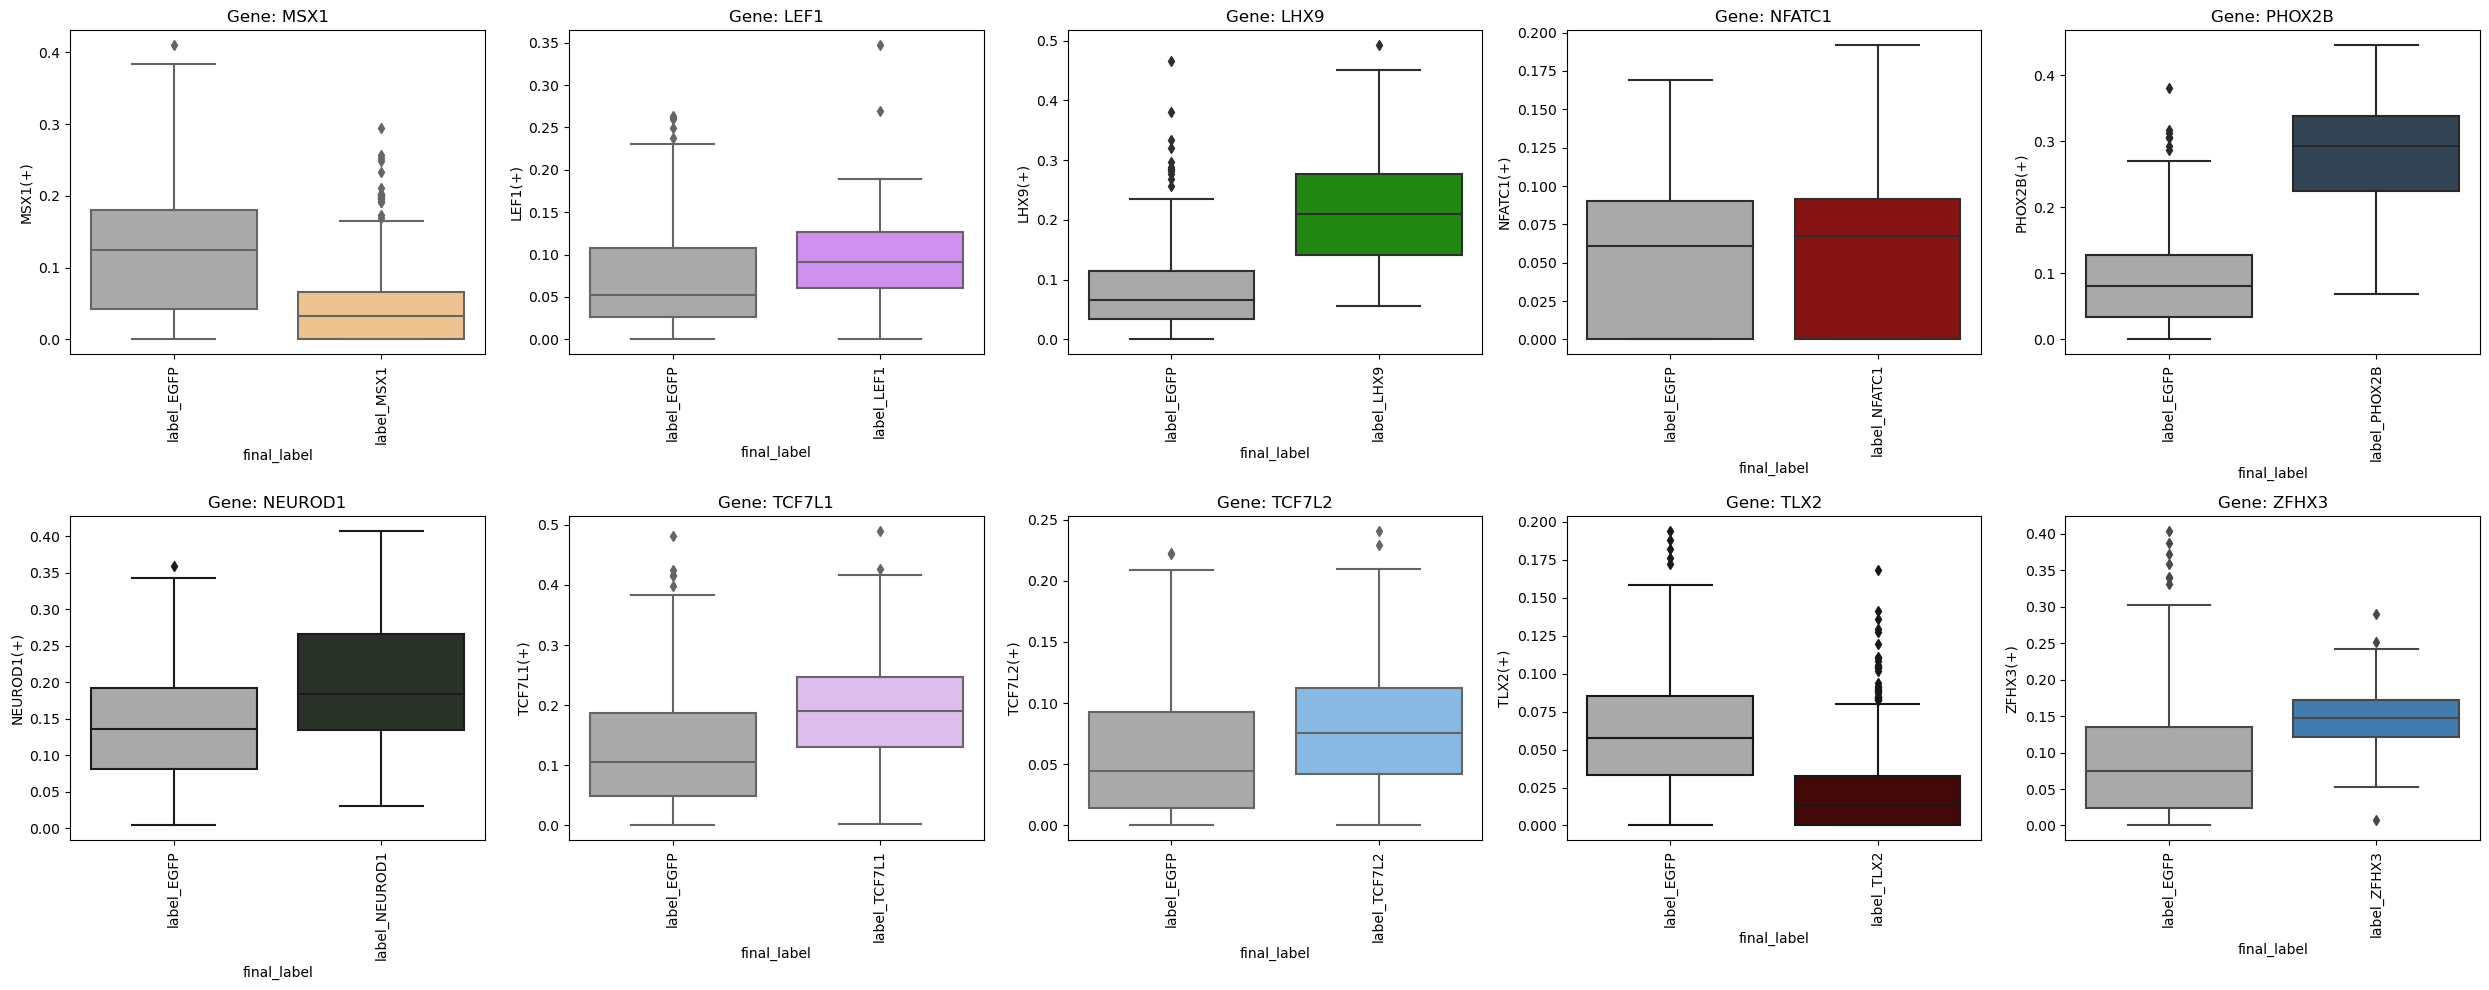

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

def plot_boxplots_in_grid(meta_use, sel_genes, label_use='final_label', ncols=5):
    nrows = int(np.ceil(len(sel_genes) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for idx, gene in enumerate(sel_genes):
        row = idx // ncols
        col = idx % ncols

        ax = axs[row, col] if nrows > 1 else axs[col]

        sel_labels = ['label_EGFP', 'label_' + gene]
        meta_use_sel = meta_use.loc[meta_use[label_use].isin(sel_labels)].copy()
        meta_use_sel[label_use] = meta_use_sel[label_use].astype('str')
        
        label_color = label_colors.loc['label_'+gene][0]

        sns.boxplot(ax=ax, x=label_use, y=gene + '(+)', data=meta_use_sel,palette=['darkgrey',label_color])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'Gene: {gene}')

    # Hide any empty subplots
    for idx in range(len(sel_genes), nrows * ncols):
        fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.savefig("figures/boxplots_regulons_oe_subset_colored.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/boxplots_regulons_oe_subset_colored.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()
# Example usage:
plot_boxplots_in_grid(meta_class_use, genes_use)


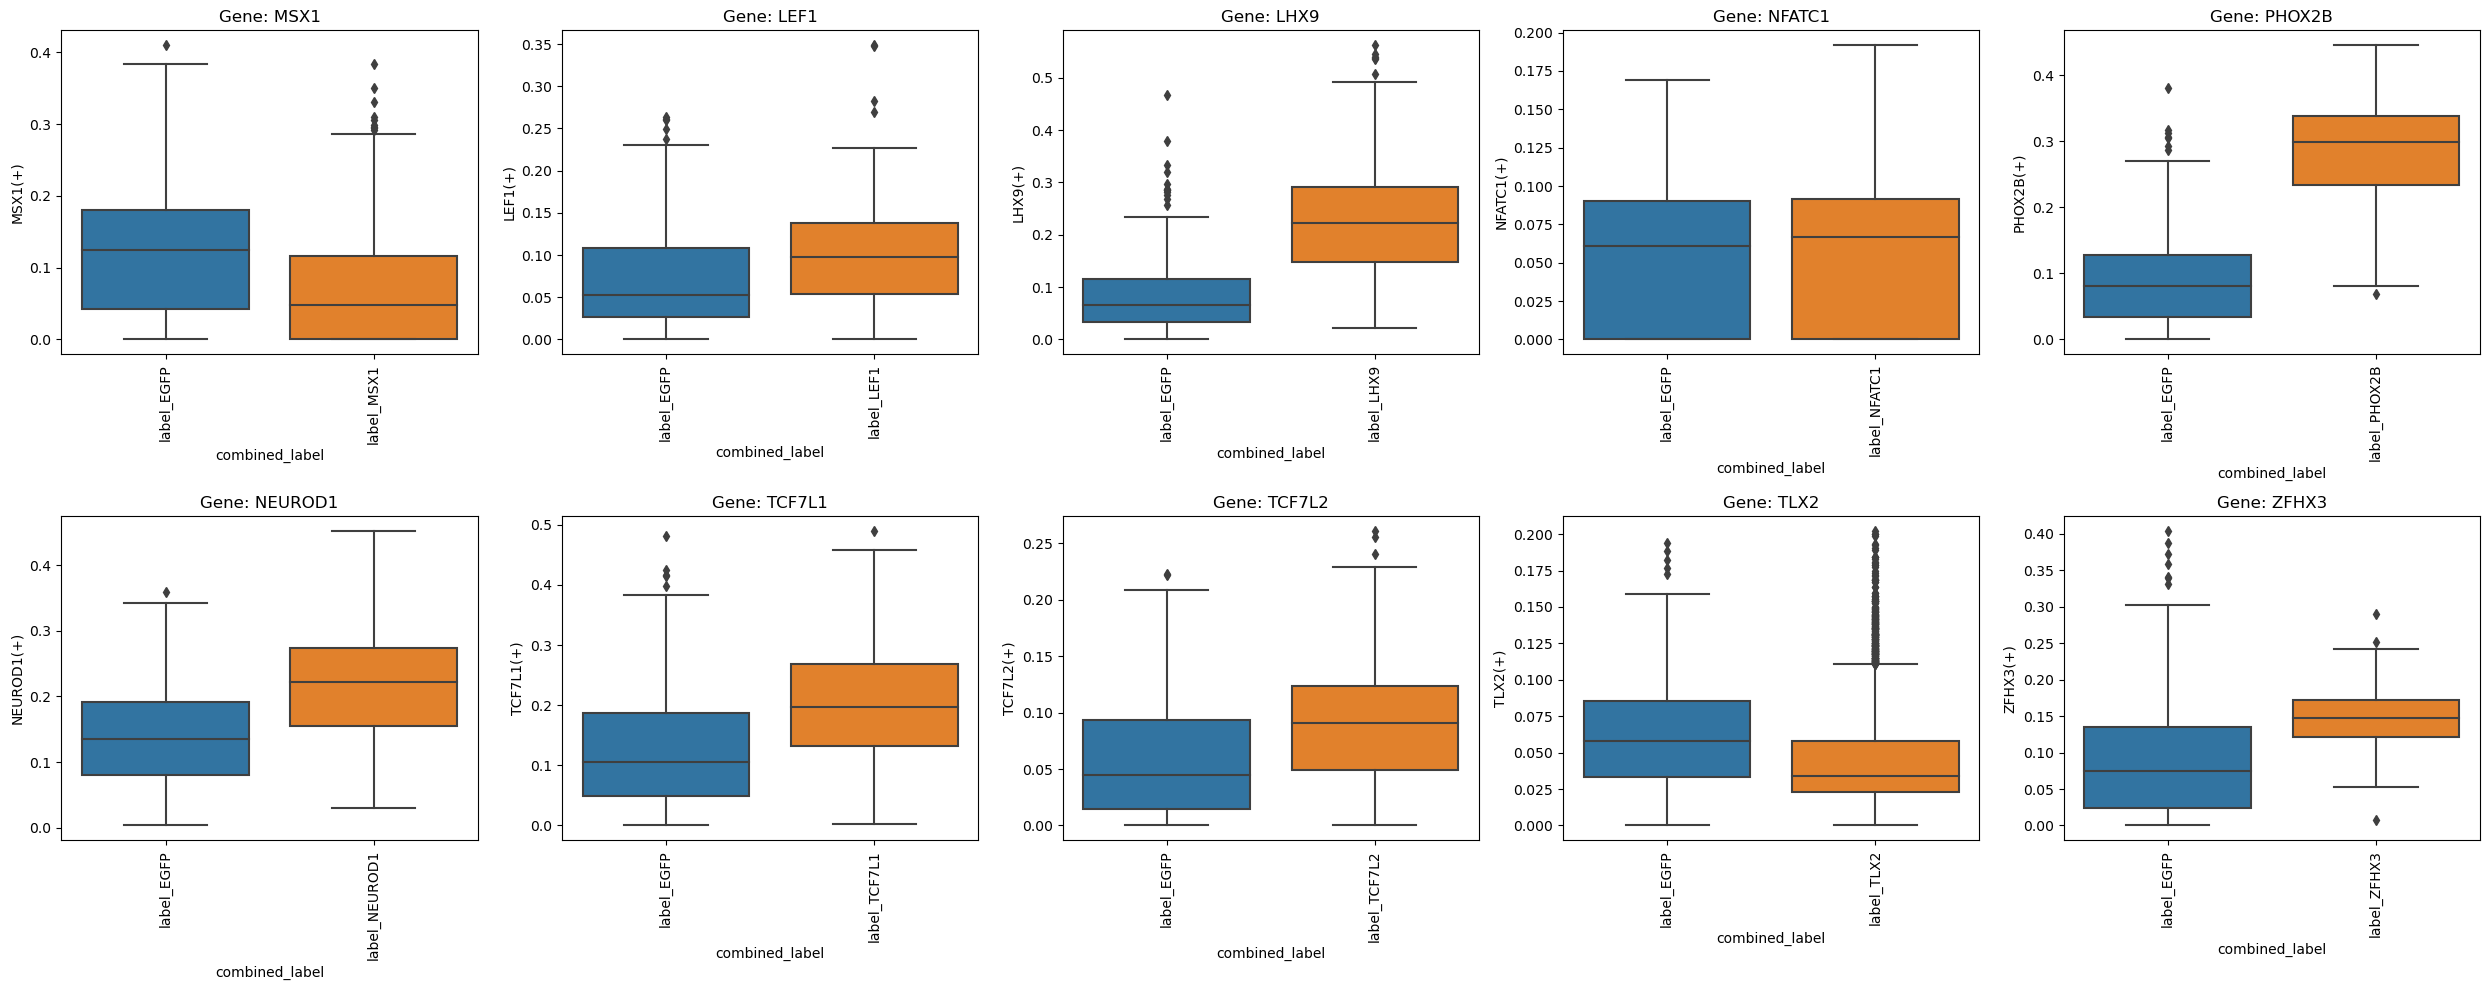

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplots_in_grid(meta_use, sel_genes, label_use='combined_label', ncols=5):
    nrows = int(np.ceil(len(sel_genes) / ncols))
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

    for idx, gene in enumerate(sel_genes):
        row = idx // ncols
        col = idx % ncols

        ax = axs[row, col] if nrows > 1 else axs[col]

        sel_labels = ['label_EGFP', 'label_' + gene]
        meta_use_sel = meta_use.loc[meta_use[label_use].isin(sel_labels)].copy()
        meta_use_sel[label_use] = meta_use_sel[label_use].astype('str')

        sns.boxplot(ax=ax, x=label_use, y=gene + '(+)', data=meta_use_sel)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'Gene: {gene}')

    # Hide any empty subplots
    for idx in range(len(sel_genes), nrows * ncols):
        fig.delaxes(axs.flatten()[idx])

    plt.tight_layout()
    plt.savefig("figures/boxplots_regulons_oe_subset_combinedlabel.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("figures/boxplots_regulons_oe_subset_combinedlabel.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()
# Example usage:
plot_boxplots_in_grid(meta_class_use, genes_use)
